# Capture

In [3]:
push!(LOAD_PATH,"../src/")

using CaptureRate
using Plots
using Phonon: harmonic, solve1D_ev_amu
using LaTeXStrings
# using PyPlot

# Building potentials and configuration coordinate

In [60]:
Qi=-3
Qf=10
NQ=500
nev=65

65

In [92]:
v_morse = x -> (1.5 - e.^(-0.5.*(x))).^2
v_harm = x -> 0.2*(x-2) .^2-0.25

x = linspace(Qi, Qf, NQ)
# define potential
# Ground state
E1 = v_morse(x)
V1 = CaptureRate.potential(x, E1)
# # Excited state
E2 = v_harm(x)
V2 = CaptureRate.potential(x, E2)

CaptureRate.potential(-3.0:0.026052104208416832:10.0, [4.75, 4.69803, 4.64633, 4.59491, 4.54376, 4.49287, 4.44226, 4.39192, 4.34185, 4.29206  …  11.8107, 11.8918, 11.9731, 12.0547, 12.1366, 12.2187, 12.3011, 12.3838, 12.4668, 12.55])

In [93]:
ϵ1, χ1 = solve1D_ev_amu(x->v_morse(x), NQ=NQ, Qi=Qi, Qf=Qf, nev=nev)
# Excited state
ϵ2, χ2 = solve1D_ev_amu(x->v_harm(x), NQ=NQ, Qi=Qi, Qf=Qf, nev=nev)

cc = CaptureRate.CC()
cc.V1 = V1; cc.V2 = V2
cc.ϵ1 = ϵ1; cc.χ1 = χ1
cc.ϵ2 = ϵ2; cc.χ2 = χ2
println()

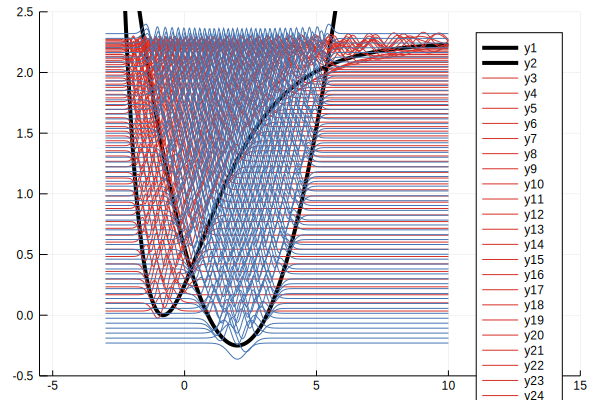

In [94]:
CaptureRate.plot_potentials(cc, plot_wf=true)
ylims!(-0.5, 2.5)
xlims!(-5.5, 15)

In [95]:
CaptureRate.calc_overlap!(cc; cut_off=0.25, σ=0.01)
# Excited state
# plot!(cc.V1.Q, cc.V1.E, lw=4, color="black")
# # Ground state
# plot!(cc.V2.Q, cc.V2.E, lw=4, color="black")

# ylims!(-0.5, 2.5)
# xlims!(-5.5, 15)

# Morese-Harmonic

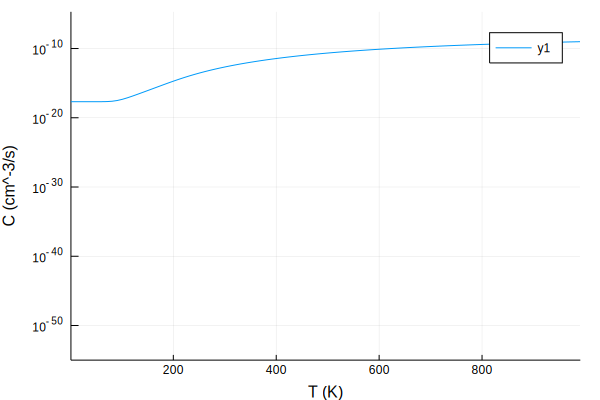

In [96]:
T_range = 1:10:1000
c = CaptureRate.calc_capt_coeff(6.4E-2, 1.1E-21, T_range, cc)
plot(T_range, c*4*6) # degeneracy * Sommerfeld factor
yaxis!("C (cm^-3/s)",:log10)
xaxis!("T (K)")
ylims!(1E-55, 2E-5)

# Harmonic fit 

## Low temperature

In [97]:
# println(cc.ϵ1[1]*2)
# println((cc.ϵ1[35]-cc.ϵ1[34]))
ħω1 = cc.ϵ1[1]*2
ħω2 = (cc.ϵ2[1]+0.25)*2
minval, minind = findmin(cc.V1.E)
Q10 = cc.V1.Q[minind]
println("ħω1: ", ħω1)
println("ħω2: ", ħω2)
println("x10: ", minind, Q10)
# println("x20: ", ħω1)

ħω1: 0.06840392858979641
ħω2: 0.04095584447089795
x10: 85-0.811623246492986


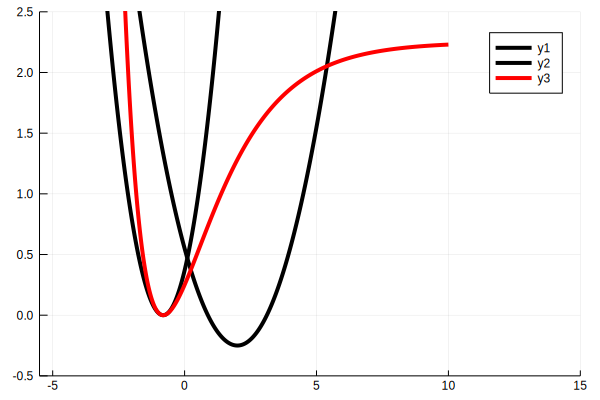

In [98]:
# define potential
# Ground state: harmonic approx 
E1 = harmonic(x-Q10, ħω1)
V1 = CaptureRate.potential(x, E1)

ϵ1, χ1 = solve1D_ev_amu(x->harmonic(x-Q10, ħω1), NQ=NQ, Qi=Qi, Qf=Qf, nev=nev)
cc_lowT = CaptureRate.CC()
cc_lowT.V1 = V1; cc_lowT.V2 = V2
cc_lowT.ϵ1 = ϵ1; cc_lowT.χ1 = χ1
cc_lowT.ϵ2 = ϵ2; cc_lowT.χ2 = χ2

CaptureRate.plot_potentials(cc_lowT)
plot!(cc.V1.Q, cc.V1.E, lw=4, color="red")    

ylims!(-0.5, 2.5)
xlims!(-5.5, 15)

# ylims!(-2, 2)
# xlims!(-4, 3)

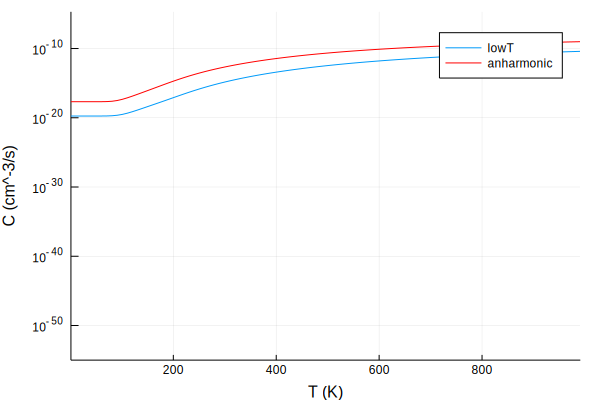

In [99]:
CaptureRate.calc_overlap!(cc_lowT; cut_off=0.25, σ=0.01)
c_lowT = CaptureRate.calc_capt_coeff(6.4E-2, 1.1E-21, T_range, cc_lowT)
plot(T_range, c_lowT*4*6, label="lowT") # degeneracy * Sommerfeld factor
plot!(T_range, c*4*6, color="red", label="anharmonic") # degeneracy * Sommerfeld factor
yaxis!("C (cm^-3/s)",:log10)
xaxis!("T (K)")
ylims!(1E-55, 2E-5)

## Optical absorption ? High temperature

In [100]:
# println(cc.ϵ1[1]*2)
# println((cc.ϵ1[35]-cc.ϵ1[34]))
minval, minind = findmin(cc.V2.E)
Q20 = cc.V2.Q[minind]
abs = cc.V1.E[minind]
println(Q20)
println(Q10)

2.002004008016032
-0.811623246492986


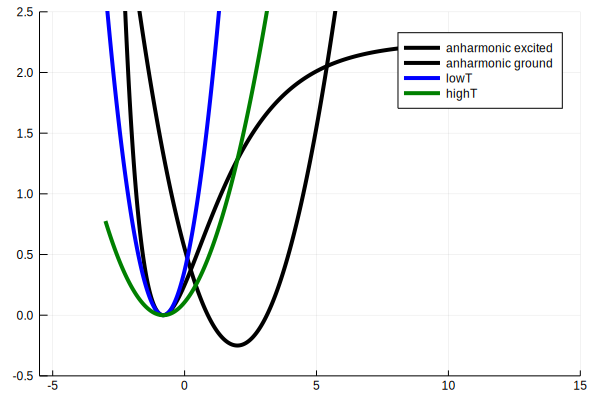

In [101]:
pot_highT = x->abs/(Q20-Q10)^2*(x-Q10).^2
E1 = pot_highT(x)
V1 = CaptureRate.potential(x, E1)

ϵ1, χ1 = solve1D_ev_amu(x->pot_highT(x), NQ=NQ, Qi=Qi, Qf=Qf, nev=nev)
cc_highT = CaptureRate.CC()
cc_highT.V1 = V1; cc_highT.V2 = V2
cc_highT.ϵ1 = ϵ1; cc_highT.χ1 = χ1
cc_highT.ϵ2 = ϵ2; cc_highT.χ2 = χ2

# CaptureRate.plot_potentials(cc_highT)
plot(cc.V1.Q, cc.V1.E, lw=4, color="black", label="anharmonic excited") 
plot!(cc.V2.Q, cc.V2.E, lw=4, color="black", label="anharmonic ground") 
plot!(cc_lowT.V1.Q, cc_lowT.V1.E, lw=4, color="blue", label="lowT")
plot!(cc_highT.V1.Q, cc_highT.V1.E, lw=4, color="green", label="highT") 

ylims!(-0.5, 2.5)
xlims!(-5.5, 15)

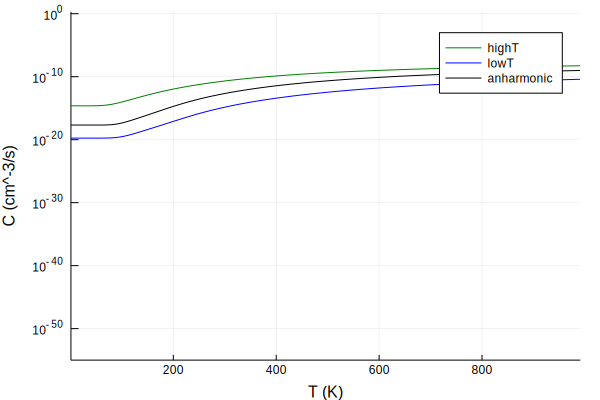

In [102]:
CaptureRate.calc_overlap!(cc_highT; cut_off=0.25, σ=0.01)
c_highT = CaptureRate.calc_capt_coeff(6.4E-2, 1.1E-21, T_range, cc_highT)
plot(T_range, c_highT*4*6, color="green", label="highT") # degeneracy * Sommerfeld factor
plot!(T_range, c_lowT*4*6, color="blue", label="lowT") # degeneracy * Sommerfeld factor
plot!(T_range, c*4*6, color="black", label="anharmonic") # degeneracy * Sommerfeld factor
yaxis!("C (cm^-3/s)",:log10)
xaxis!("T (K)")
ylims!(1E-55, 2)

# Crossing point

In [103]:
minval, Q1ind = findmin(cc.V1.E)
minval, Q2ind = findmin(cc.V2.E)

diff = abs2.(cc.V2.E[Q1ind: Q2ind] - cc.V1.E[Q1ind: Q2ind])
minval, minind = findmin(diff)
println(minval)
println(minind)
Q_cross = cc.V1.Q[Q1ind+minind]
E_cross = cc.V1.E[Q1ind+minind]

3.100783995597891e-5
41


0.3848617729439149

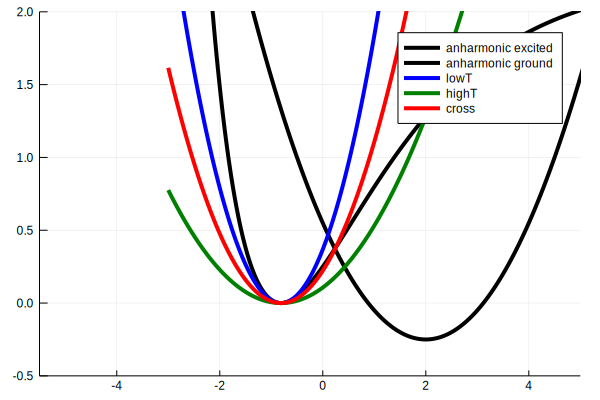

In [107]:
pot_cross = x->E_cross/(Q_cross-Q10)^2*(x-Q10).^2
E1 = pot_cross(x)
V1 = CaptureRate.potential(x, E1)

ϵ1, χ1 = solve1D_ev_amu(x->pot_cross(x), NQ=NQ, Qi=Qi, Qf=Qf, nev=nev)
cc_cross = CaptureRate.CC()
cc_cross.V1 = V1; cc_cross.V2 = V2
cc_cross.ϵ1 = ϵ1; cc_cross.χ1 = χ1
cc_cross.ϵ2 = ϵ2; cc_cross.χ2 = χ2

# CaptureRate.plot_potentials(cc_highT)
plot(cc.V1.Q, cc.V1.E, lw=4, color="black", label="anharmonic excited") 
plot!(cc.V2.Q, cc.V2.E, lw=4, color="black", label="anharmonic ground") 
plot!(cc_lowT.V1.Q, cc_lowT.V1.E, lw=4, color="blue", label="lowT")
plot!(cc_highT.V1.Q, cc_highT.V1.E, lw=4, color="green", label="highT") 
plot!(cc_cross.V1.Q, cc_cross.V1.E, lw=4, color="red", label="cross") 

ylims!(-0.5, 2)
xlims!(-5.5, 5)

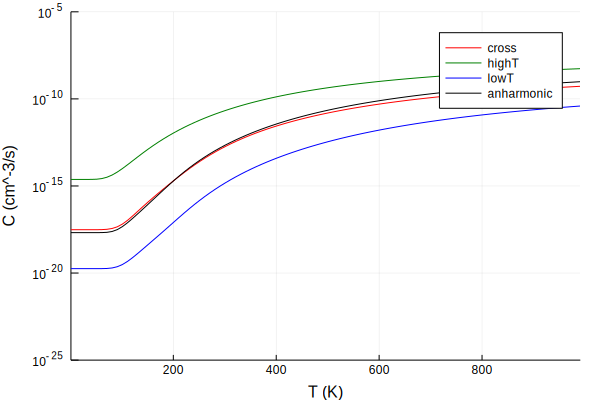

In [106]:
CaptureRate.calc_overlap!(cc_cross; cut_off=0.25, σ=0.01)
c_cross = CaptureRate.calc_capt_coeff(6.4E-2, 1.1E-21, T_range, cc_cross)
plot(T_range, c_cross*4*6, color="red", label="cross") # degeneracy * Sommerfeld factor
plot!(T_range, c_highT*4*6, color="green", label="highT") # degeneracy * Sommerfeld factor
plot!(T_range, c_lowT*4*6, color="blue", label="lowT") # degeneracy * Sommerfeld factor
plot!(T_range, c*4*6, color="black", label="anharmonic") # degeneracy * Sommerfeld factor
yaxis!("C (cm^-3/s)",:log10)
xaxis!("T (K)")
ylims!(1E-25, 1E-5)

# Fit to energy barrier 
## High T
Classical: low hw -> low attempt frequency or large partition funcition(?)
## Low T
Tunneling: Broader potential -> larger overlap with wf of the grou
